In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
from tqdm import tqdm

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from bs4 import BeautifulSoup

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('train.csv', encoding='latin-1')

In [4]:
df['Sentiment'].value_counts()

2    59605
3    24778
1    20563
4     6846
0     5253
Name: Sentiment, dtype: int64

<AxesSubplot:>

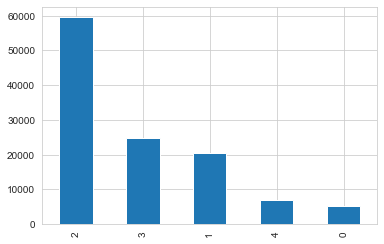

In [5]:
df['Sentiment'].value_counts().plot.bar()

In [6]:
from sklearn.model_selection import train_test_split

X = df['Phrase']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:
import re 

def preprocessor(text):
    lemmatizer = WordNetLemmatizer()
    sentences = text.split(' ')
    words = []
    
    for word in sentences:
        word = re.sub("n't", 'not', word)
        word = re.sub('<[^>]*>', '', word)
        word = re.sub('[^a-zA-Z]', '', word)
        word = re.sub(r'[^\w\s]','',word)
        
        word = lemmatizer.lemmatize(word, pos = 'v')
        word = lemmatizer.lemmatize(word, pos = 'n')
        word = lemmatizer.lemmatize(word, pos = 'a')
        words.append(word)
        
    return ' '.join(words)

In [ ]:
# tfidf = TfidfVectorizer(norm='l1', smooth_idf=False)

In [ ]:
# ngram_range: An n-gram is just a string of n words in a row.
# E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram.
# Set the parameter ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features.
# The default ngram_range is (1,1).
# In a recent project found that including 2-grams as features boosted model’s predictive power significantly.
# This makes intuitive sense; many job titles such as ‘data scientist’, ‘data engineer’, and ‘data analyst’ are 2 words long.

In [78]:
# max_df is used for removing data values that appear too frequently, also known as "corpus-specific stop words". (default: 1.0)
# Ex: max_df = 0.50 means "It ignores terms that appear in more than 50% of the documents".
#     max_df = 25 means "It ignores terms that appear in more than 25 documents".
# min_df is used for removing terms that appear too infrequently. (default: 1.0)
# Ex: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#     min_df = 5 means "ignore terms that appear in less than 5 documents".
    

In [8]:
count = CountVectorizer(ngram_range=(1,2),
                        lowercase= True,
                        preprocessor=preprocessor,
#                         max_df= 1.0
                        )

In [9]:
clf = Pipeline([('vect', count),
                ('clf', LogisticRegression(random_state=0, max_iter= 500))])

clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 preprocessor=<function preprocessor at 0x0000019B8D3748B8>)),
                ('clf', LogisticRegression(max_iter=500, random_state=0))])

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6507326242043658
confusion matrix:
 [[ 345  529  185    8    1]
 [ 294 1921 1924   94    7]
 [  65  809 9990  849   38]
 [   5  108 2019 2449  377]
 [   2    3  169  690  528]]
classification report:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39      1068
           1       0.57      0.45      0.50      4240
           2       0.70      0.85      0.77     11751
           3       0.60      0.49      0.54      4958
           4       0.56      0.38      0.45      1392

    accuracy                           0.65     23409
   macro avg       0.58      0.50      0.53     23409
weighted avg       0.64      0.65      0.64     23409



Text(0.5, 16.0, 'Predict')

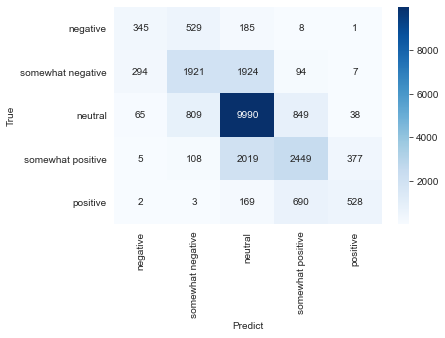

In [12]:
# Visuallize with heat map

cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True,fmt='g', cmap='Blues', xticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'], yticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
plt.ylabel('True')
plt.xlabel('Predict')

In [13]:
import pickle
import os

pickle.dump(clf, open('week5.pkl', 'wb'))